### Solve the knapsack problem with Tabu search algorithm
#### Problem description
In the knapscak problem, where are _n_ items with values $(v_1,v_2,\ldots,v_n)$ and weigths $(w_1,w_2,\ldots,w_n)$ and the value _W_
specifying the capacity of the knapsack.We would like to maximise
\begin{equation*}
\sum_{j=1}^n v_j x_j
\end{equation*}

where $ x \in \{0,1\}$ and also 
\begin{equation*}
\sum_{i=1}^n w_i \leq W
\end{equation*}
If the value of $x$ is equal to $1$ element is selected, othewise element is removed from the knapsack. Using tabu search algorithm we can avoid local best solution problem and usually $f(x_i) \leq f(x_j)$ is not true $\forall i\le j$ where $f(x_i)$ is the value of the knapsack at the iteration step $i$.


In [3]:
import numpy as np
import random
%matplotlib inline
from matplotlib.pyplot import *
import seaborn as sns
sns.set(color_codes=True)

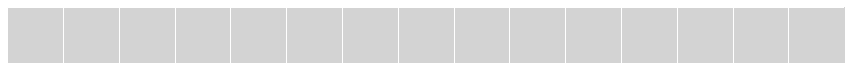

In [4]:
weigths = np.array([70,73,77,80,82,87,90,94,98,106,110,113,115,118,120])
values = np.array([135,139,149,150,156,163,173,184,192,201,210,214,221,229,240])
total_capacity = 750
selected_color ="#000000"
not_selected_color ="#d3d3d3"
knapsack_indicator =[not_selected_color for weigth in weigths]
sns.palplot(knapsack_indicator)

Let's make a characteristic function so  we can calculate the total value and weigth usig dot product

In [5]:
def knapsack_palette(set_indicator):
    return [selected_color if indicator == 1  else not_selected_color for indicator in set_indicator]
def characteristic_function(elements,subset):
    return np.array([1 if x in subset else 0 for x in elements])

def swap(neighbour,knapsack):
    if neighbour not in knapsack:
        return np.append(knapsack,neighbour)
    else:
        return knapsack[ knapsack != neighbour]
        
        


In [6]:
def fitness(penalty,knapsack,weights,values,capacity):
    set_indicator = characteristic_function(weigths,knapsack)
    v = np.dot(set_indicator,values)
    w = np.dot(set_indicator,weights)
    return v - penalty*(max(0,w - capacity))


In [7]:
def tabusearch(values,weigths,capacity,max_iterations,penalty_multiplier):
    current_solution = np.zeros(len(weigths))
    tabulist = np.array([])
    knapsack = np.array([])
    best_fitness = 0
    n = 0
    while (n < max_iterations):
        neighbours = np.setdiff1d(weigths,tabulist)
        for neighbour  in neighbours:
            candinate = swap(neighbour,knapsack)
            current_fitness = fitness(penalty_multiplier,candinate,weigths,values,capacity)
            if current_fitness > best_fitness:   
                best_solution = neighbour
                best_fitness = current_fitness
        
        knapsack = swap(best_solution,knapsack)
        n = n +1
        tabulist = np.append(tabulist,best_solution)
        if(len(tabulist) > 5):
            tabulist = tabulist[1:]
        best_fitness  = 0 
    return np.dot(characteristic_function(weigths,knapsack),values) ,np.dot(characteristic_function(weigths,knapsack),weigths),knapsack 
    

In [8]:
max_iterations = 1000
data_results = [(penalty,(tabusearch(values,weigths,total_capacity,max_iterations,penalty))) for penalty in np.arange(1,3,step =.1)]

In [9]:
values_p = np.array([row[1][0] for row in data_results])
weights_p = np.array([row[1][1] for row in data_results])
knapscaks_p = np.array([row[1][2] for row in data_results])
penalties = np.array([row[0] for row in data_results])
max_weigth = [750 for row in data_results]

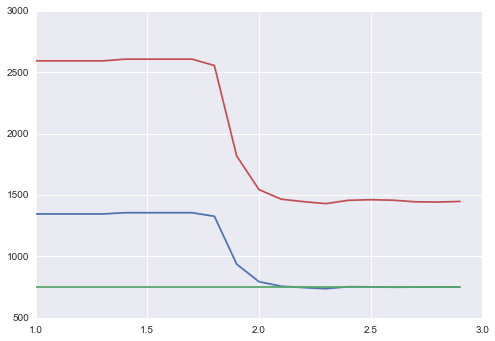

In [11]:
plot(penalties,weights_p )
plot(penalties,max_weigth)
plot(penalties,values_p )

Next we try to find out the maximal value where the total weigth is less than 750.

In [12]:
mask= weights_p <= 750
good_values = np.in1d(weights_p,weights_p[mask])
best_optimal=  values_p[np.where(good_values)]

In [13]:
mask= max(best_optimal)
best_penalty = penalties[np.argwhere(values_p == max(best_optimal))[0][0]]
print best_penalty

2.6


So we get the optimal solution with penalty value 2.6

In [14]:
solution = tabusearch(values,weigths,total_capacity,1000,best_penalty)

Total value 1458
Weigth 749
Knapsack weigths [  70.   77.   82.   90.   94.   98.  118.  120.]


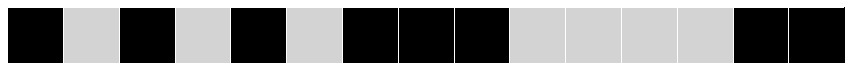

In [15]:
print "Total value %i" %solution[0]
print "Weigth %i"  %solution[1] 
print "Knapsack weigths %s" %np.sort(np.array(solution[2])) 
sns.palplot(knapsack_palette(characteristic_function(weigths,solution[2])))